# 23 Fall MAS 456 Homework 3 Solution.

In [1]:
from ISLP import load_data
from ISLP.pygam import plot as plot_gam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from pygam import LinearGAM
from itertools import combinations
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Chapter 6.

### 4. 

Increasing $\lambda$ means imposing stronger restriction in the parameter space.
Thus tuning $\lambda$ could provide us to larger bias, but smaller variance.

- Training RSS will steadily increase. $\textcolor{red}{+2}$
- Test RSS will decrease first, and form U shape afterwards. $\textcolor{red}{+2}$
- Steadily decrease. $\textcolor{red}{+2}$
- Bias will steadily increase. $\textcolor{red}{+2}$
- No change. $\textcolor{red}{+2}$

### 5.
   
Situation: $\begin{bmatrix} y \\ - y \end{bmatrix} = \begin{bmatrix} x & x \\ -x & -x\end{bmatrix} \begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix}.$

- Minimize $2(y - x\beta_1 - x\beta_2)^2 + \lambda(\beta_1^2 + \beta_2^2)$.
- By differentiation, $(4x^2 + \lambda)\beta_1 = 4xy - 4x^2 \beta_2$ and $(4x^2 + \lambda)\beta_2 = 4xy - 4x^2\beta_1$. Finally, $\lambda > 0$ gives $\beta_1 = \beta_2$ by solving the equations.
- Minimize $2(y-x\beta_1 - x\beta_2)^2 + \lambda(|\beta_1|+|\beta_2|)$. Or, minimize $2(y-x\beta_1 -x\beta_2)^2$ subject to $|\beta_1|+|\beta_2| \le s$.
- Observe that $(y - x\beta_1 - x\beta_2)^2$ has the same value whenever $\beta_1 + \beta_2$ is the same.

### 7.

Let $i = 1, \dots, n$ and $j = 1, \dots, p$.

- Each $y_i$ follows $N(\beta_0 + \sum_j x_{ij}\beta_j, \sigma^2)$. Likelihood is the product of those densities, i.e. $(2\pi \sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2}\sum_i \left( y_i - \beta_0 - \sum_j x_{ij} \beta_j \right)^2 \right)$. $\textcolor{red}{+2}$
- Posterior density is proportional to $\exp \left( -\frac{1}{2\sigma^2}\sum_i \left( y_i - \beta_0 - \sum_j x_{ij} \beta_j \right)^2 \right) \times \exp \left( -\sum_j \frac{|\beta_j|}{b} \right)$. $\textcolor{red}{+2}$
- The mode means, the maximizer. The exponents are maximized when $\beta$ is the lasso estimator. (Recall the definition!) $\textcolor{red}{+2}$
- In similar manner, we can easily derive that $\exp \left( -\frac{1}{2\sigma^2}\sum_i \left( y_i - \beta_0 - \sum_j x_{ij} \beta_j \right)^2 \right) \times \exp \left( -\frac{1}{2c} \sum_j \beta_j^2 \right)$. $\textcolor{red}{+2}$
- The ridge estimator is the mode. Note that this pdf is a kind of normal distribution in terms of $\beta$, so the mode is the mean. $\textcolor{red}{+2}$

### 9.

a.

In [2]:
df = load_data('College')
df['Private.Yes'] = df.Private.map({'Yes': 1, 'No': 0})
df.drop('Private', axis=1, inplace=True)
y, X = df['Apps'], df.drop('Apps', axis=1)

X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, random_state=0)

b.

In [3]:
lmod = LinearRegression()
lmod.fit(X_train, y_train)
np.mean( (lmod.predict(X_test)  - y_test)**2 )

1022430.0889255512

c.

In [4]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
ridge = RidgeCV(alphas=np.linspace(.01, 100, 1000),  cv=10)
ridge.fit(X_train, y_train)
np.mean( (ridge.predict(X_test) - y_test)**2 )

990446.0349411067

d.

In [6]:
lasso = LassoCV(alphas=np.linspace(.01, 100, 1000),  cv=10)
lasso.fit(X_train, y_train)
np.mean( (lasso.predict(X_test) - y_test)**2 )

1008209.5176971412

g. All threes are not very accurate, and it seems there is no significant difference among them.

### 10.

a.

In [7]:
np.random.seed(0)
# For p = 20, we need 1M model fitting. In order to avoid time consumption, we reduce p to 10.
n, p = 1000, 10
X = np.random.normal(size=(n, p))
e = np.random.normal(size=n)
beta = np.array([1,2,3,4,5] + [0]*5)
y = np.dot(X, beta) + e

b.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)

c, d. $\textcolor{red}{+5}$

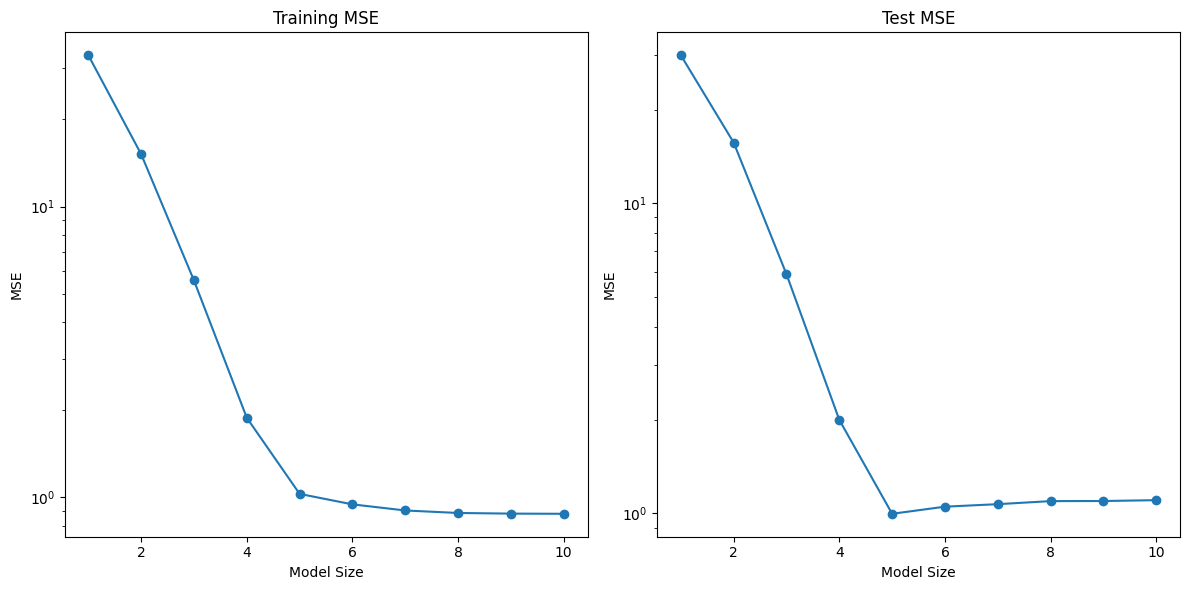

In [9]:
lmod = LinearRegression()
def fit_best_subset(X, y, k):
    features = list(combinations(range(p), k))
    best_mse = float('inf')
    best_model = None

    for f in features:
        lm = lmod.fit(X[:,f], y)
        mse = np.mean( (y - lm.predict(X[:,f]))**2 )
        if mse < best_mse:
            best_mse = mse
            best_feature = f

    return best_feature

train_mse = []
for i in range(1, p + 1):
    f = fit_best_subset(X_train, y_train, i)
    lm  = lmod.fit(X_train[:,f], y_train)
    mse = np.mean( (y_train - lm.predict(X_train[:,f]) )**2 )
    train_mse.append(mse)

test_mse = []
for i in range(1, p + 1):
    f = fit_best_subset(X_train, y_train, i)
    lm  = lmod.fit(X_train[:,f], y_train)
    mse = np.mean( (y_test - lm.predict(X_test[:,f]) )**2 )
    test_mse.append(mse)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,6))
ax0.semilogy(range(1, p + 1), train_mse, marker='o')
ax0.set_xlabel("Model Size")
ax0.set_ylabel("MSE")
ax0.set_title("Training MSE")
ax1.semilogy(range(1, p + 1), test_mse, marker='o')
ax1.set_xlabel("Model Size")
ax1.set_ylabel("MSE")
ax1.set_title("Test MSE")
plt.tight_layout()
plt.show()

e. 

Recall that we set some of $\beta_j$'s equal to zero.
Also, we generated the design matrix totally random, for which the columns of the design matrix $X$ must be linearly independent.

Hence the best feature size should be $20 - |\{j: \beta_j = 0\}|$.

f. 

They are similar, if there is no coincidence of collinearity.

g. $\textcolor{red}{+5}$

The metric drops sharply as the model size increases and reaches to $20 - |\{j: \beta_j = 0\}|$.
Two plots are very similar, in that there is no additional benefit of increasing the feature size.

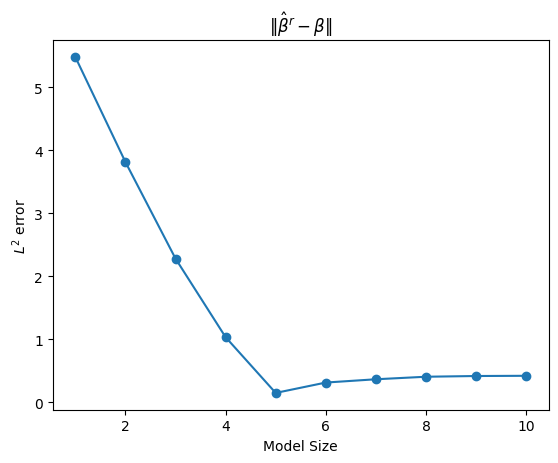

In [10]:
errors = []
for i in range(1, p + 1):
    f = fit_best_subset(X_train, y_train, i)
    lm  = lmod.fit(X_train[:,f], y_train)
    hat_beta = np.zeros((p,))
    hat_beta[list(f)] = lm.coef_
    errors.append( np.linalg.norm(beta - hat_beta) )

plt.plot(range(1, p + 1), errors, marker='o')
plt.xlabel("Model Size")
plt.ylabel(r"$L^2$ error")
plt.title(r"$\|\hat{\beta}^r - \beta\|$")
plt.show()

## Chapter 7.

### 1.

- For $x\le \xi$, the last term of $f$ dies. So $(a,b,c,d) = (\beta_0, \dots, \beta_3)$.
- For $x > \xi$, the last term is expanded to $\beta_4(x^3 - 3\xi x^2 + 3\xi^2 x - \xi^3)$. Thus, compare the coefficients for each monomial.
- This is obvious, since the last term of $f$ dies when $x = \xi$.
- Omitted. Note that, "differentiable at $\xi$" does not gurantee that "derivative is continuous at $\xi$".

### 2.

- Since $\lambda = \infty$, one must make the penalty term zero first. This means our solution space is reduced to "functions whose square integral is zero", which is the zero function. $\textcolor{red}{+2}$
- Since $m=1$, the target function space is "functions whose first derivative is zero", which is the set of constant functions. $\textcolor{red}{+2}$
- Similarly, degree 1 polynomials. $\textcolor{red}{+2}$
- Quadratic polynomials. $\textcolor{red}{+2}$
- Since $\lambda = 0$, there is no worry about the penalty term. Hence solutions are any smooth interpolation of given data points. $\textcolor{red}{+2}$

### 4.

![Sketch](figures/ch7pb4.png)

### 10.

In [11]:
df = load_data("College")
df['Private.Yes'] = df.Private.map({'Yes': 1, 'No': 0})
df.drop('Private', axis=1, inplace=True)
y, X = df['Outstate'].values, df.drop('Outstate', axis=1).values

X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y)

a.

It seems six features will be enough.

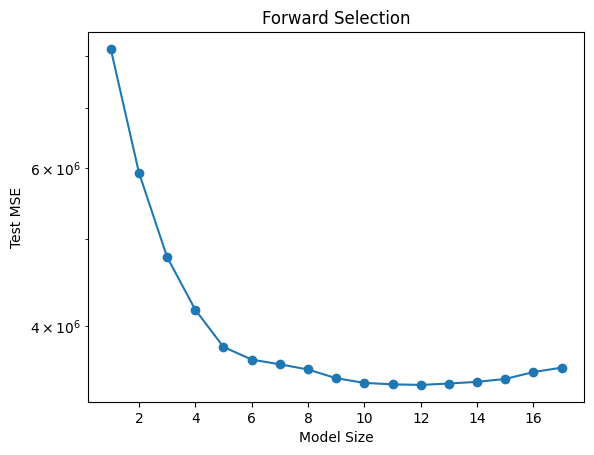

In [12]:
lmod = LinearRegression()

def forward_stepwise_selection(X_train, y_train):
    remaining_predictors = list(range(0, X_train.shape[1]))
    selected_predictors = []

    while remaining_predictors:
        mse_list = []
        for predictor in remaining_predictors:
            current_predictors = selected_predictors + [predictor]
            lm = lmod.fit(X_train[:,current_predictors], y_train)
            mse = np.mean( (y_test - lm.predict(X_test[:,current_predictors]))**2 )
            mse_list.append((mse, predictor))

        mse, predictor = min(mse_list)

        selected_predictors.append(predictor)
        remaining_predictors.remove(predictor)

        yield mse, selected_predictors.copy()

models = list(forward_stepwise_selection(X_train, y_train))

plt.semilogy(range(1, len(models) + 1), [m[0] for m in models], marker='o')
plt.xlabel('Model Size')
plt.ylabel('Test MSE')
plt.title('Forward Selection')
plt.show()

b.

In [13]:
model = models[6 - 1][1]
gam = LinearGAM()
gam = gam.fit(X_train[:, model], y_train)

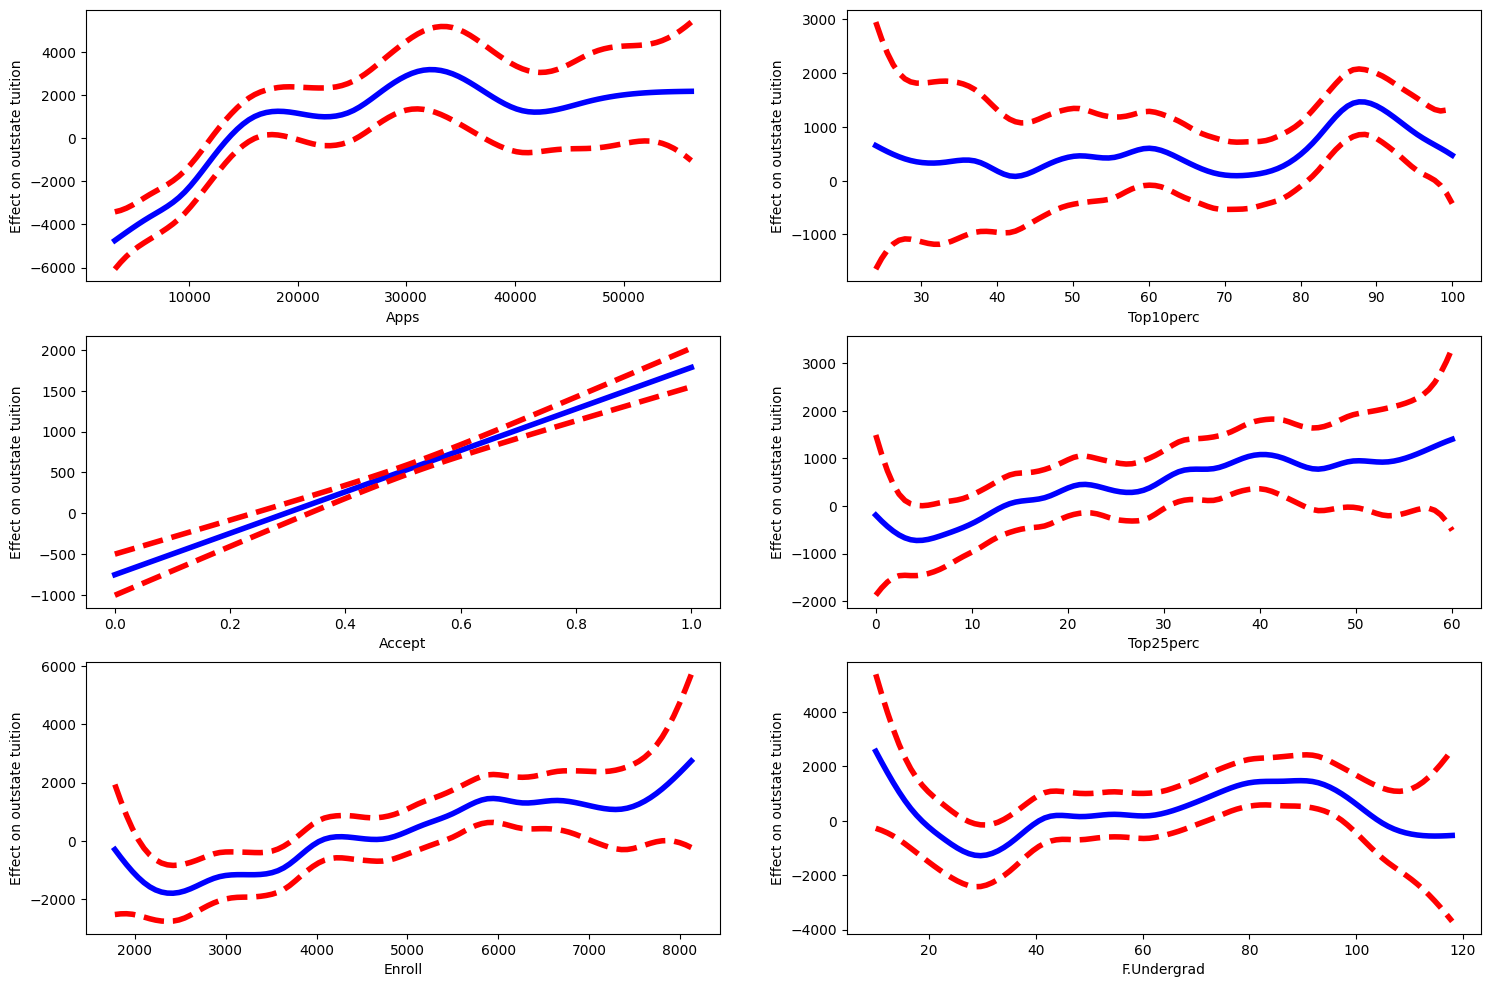

In [14]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
for i in range(len(model)):
    ax = fig.add_subplot(gs[i%3,i//3])
    plot_gam(gam, i, ax=ax)
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel('Effect on outstate tuition')

c.

Linear model test mse, and GAM test mse are similar. (About relative error of 10^-1)

In [15]:
print(f"linear model test mse: {models[5][0]:.8e}")

linear model test mse: 3.67188361e+06


In [16]:
print(f"GAM test mse: {np.mean( (gam.predict(X_test[:,model]) - y_test)**2 ):.8e}")

GAM test mse: 3.31096507e+06


d.

Refer to the summary table, the (1st, 2nd, 3rd, 5th) features have non-linear relationship to the predictor.
However, the warning says reported p-values might be exaggerated, so careful analysis will be necessary.

In [17]:
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     54.1892
Link Function:                     IdentityLink Log Likelihood:                                 -9318.4847
Number of Samples:                          582 AIC:                                            18747.3477
                                                AICc:                                           18759.1429
                                                GCV:                                          4298618.3852
                                                Scale:                                        3584764.6954
                                                Pseudo R-Squared:                                   0.7911
Feature Function                  Lam

/var/folders/ln/4jwqd3695wvcnj49xbxpr_sh0000gn/T/ipykernel_8272/3564666153.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


### 11.

a.

In [18]:
np.random.seed(0)

#a
X1 = np.random.normal(1, 4, 100)
X2 = np.random.normal(3, 2, 100)
eps = np.random.normal(0, 0.1, 100)
b0, b1, b2 = -500, 500, 1
Y = b0 + b1*X1 + b2*X2 + eps

b, c.

In [19]:
#b
def simple_reg(outcome, feature):
    X = np.vstack([np.ones((100,)), feature]).T
    params = np.linalg.inv(X.T @ X) @ X.T @ outcome
    intercept, slope = params
    return intercept, slope

#c
beta1 = 0

d, e.

In [20]:
outcome = Y - beta1 * X1
feature = X2
beta0, beta2 = simple_reg(outcome, feature)

outcome = Y - beta2*X2
feature = X1
beta0, beta1 = simple_reg(outcome, feature)

f. $\textcolor{red}{+10}$

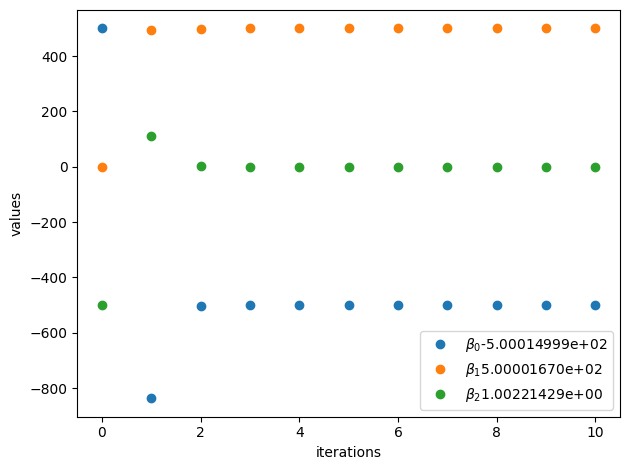

In [21]:
beta0, beta1, beta2 = 500,0,-500
log0, log1, log2 = [beta0], [beta1], [beta2]
for _ in range(10):
    #fix beta1
    outcome = Y - beta1*X1
    feature = X2
    beta0, beta2 = simple_reg(outcome, feature)
    #fix beta2
    outcome = Y - beta2*X2
    feature = X1
    beta0, beta1 = simple_reg(outcome, feature)
    #logging
    log0.append(beta0), log1.append(beta1), log2.append(beta2)

length = len(log0)
plt.plot(np.arange(length), log0, 'o', label=r"$\beta_0$" + f"{log0[-1]:.8e}")
plt.plot(np.arange(length), log1, 'o', label=r"$\beta_1$" + f"{log1[-1]:.8e}")
plt.plot(np.arange(length), log2, 'o', label=r"$\beta_2$" + f"{log2[-1]:.8e}")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("values")
plt.tight_layout()
plt.show()

g. Almost the same values. At least up to 8 digits.

h. It requires just two steps.

In [22]:
X = np.vstack([np.ones((100,)), X1, X2]).T
hat_beta = np.linalg.inv(X.T @ X) @ X.T @ Y
print(hat_beta)

[-500.01499933  500.00167041    1.00221429]
